# Vehicle Price Estimation using Gradient Boosting

1. Convert Business Problem to Data Science Problem
2. Load Data
3. Understand the Data
4. Data Preprocessing
5. Exploratory Data Analysis
6. Model Building
7. Predictions and Evaluations
8. Hyperparameter Tuning

### 1. Problem Statement

Build a prediction engine which predicts the price of vehicle based on various features like fuel type, mileage, number of cylinders, horsepower etc

In [34]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)
%matplotlib inline

### 2. Load dataset

In [2]:
df = pd.read_csv('Datasets/vehicle.csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 3. Understand the data

In [3]:
df.shape

(205, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
make                205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [5]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
num_cols = df.select_dtypes(include=np.number).columns
print(f"Numerical Columns: \n {list(num_cols)} \n")

cat_cols = df.select_dtypes(exclude=np.number).columns
print(f"Categorical Columns: \n {list(cat_cols)}")

Numerical Columns: 
 ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'] 

Categorical Columns: 
 ['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


### 4. Data Pre-processing

In [7]:
df = pd.get_dummies(df, drop_first=True, columns=cat_cols)
df.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make_alfa-romero Quadrifoglio,make_alfa-romero giulia,make_alfa-romero stelvio,make_audi 100 ls,make_audi 100ls,make_audi 4000,make_audi 5000,make_audi 5000s (diesel),make_audi fox,make_bmw 320i,make_bmw x1,make_bmw x3,make_bmw x4,make_bmw x5,make_bmw z4,make_buick century,make_buick century luxus (sw),make_buick century special,make_buick electra 225 custom,make_buick opel isuzu deluxe,make_buick regal sport coupe (turbo),make_buick skyhawk,make_buick skylark,make_chevrolet impala,make_chevrolet monte carlo,make_chevrolet vega 2300,make_dodge challenger se,make_dodge colt (sw),make_dodge colt hardtop,make_dodge coronet custom,make_dodge coronet custom (sw),make_dodge d200,make_dodge dart custom,make_dodge monaco (sw),make_dodge rampage,make_honda accord,make_honda accord cvcc,make_honda accord lx,make_honda civic,make_honda civic (auto),make_honda civic 1300,make_honda civic 1500 gl,make_honda civic cvcc,make_honda prelude,make_isuzu D-Max,make_isuzu D-Max V-Cross,make_isuzu MU-X,make_jaguar xf,make_jaguar xj,make_jaguar xk,make_maxda glc deluxe,make_maxda rx3,make_mazda 626,make_mazda glc,make_mazda glc 4,make_mazda glc custom,make_mazda glc custom l,make_mazda glc deluxe,make_mazda rx-4,make_mazda rx-7 gs,make_mazda rx2 coupe,make_mercury cougar,make_mitsubishi g4,make_mitsubishi lancer,make_mitsubishi mirage,make_mitsubishi mirage g4,make_mitsubishi montero,make_mitsubishi outlander,make_mitsubishi pajero,make_nissan clipper,make_nissan dayz,make_nissan fuga,make_nissan gt-r,make_nissan juke,make_nissan kicks,make_nissan latio,make_nissan leaf,make_nissan note,make_nissan nv200,make_nissan otti,make_nissan rogue,make_nissan teana,make_nissan titan,make_peugeot 304,make_peugeot 504,make_peugeot 504 (sw),make_peugeot 505s turbo diesel,make_peugeot 604sl,make_plymouth cricket,make_plymouth duster,make_plymouth fury gran sedan,make_plymouth fury iii,make_plymouth satellite custom (sw),make_plymouth valiant,make_porcshce panamera,make_porsche boxter,make_porsche cayenne,make_porsche macan,make_renault 12tl,make_renault 5 gtl,make_saab 99e,make_saab 99gle,make_saab 99le,make_subaru,make_subaru baja,make_subaru brz,make_subaru dl,make_subaru r1,make_subaru r2,make_subaru trezia,make_subaru tribeca,make_toyota carina,make_toyota celica gt,make_toyota celica gt liftback,make_toyota corolla,make_toyota corolla 1200,make_toyota corolla 1600 (sw),make_toyota corolla liftback,make_toyota corolla tercel,make_toyota corona,make_toyota corona hardtop,make_toyota corona liftback,make_toyota corona mark ii,make_toyota cressida,make_toyota mark ii,make_toyota starlet,make_toyota tercel,make_toyouta tercel,make_vokswagen rabbit,make_volkswagen 1131 deluxe sedan,make_volkswagen 411 (sw),make_volkswagen dasher,make_volkswagen model 111,make_volkswagen rabbit,make_volkswagen rabbit custom,make_volkswagen super beetle,make_volkswagen type 3,make_volvo 144ea,make_volvo 145e (sw),make_volvo 244dl,make_volvo 245,make_volvo 246,make_volvo 264gl,make_volvo diesel,make_vw dasher,make_vw rabbit,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [8]:
df.shape

(205, 190)

### 5. EDA

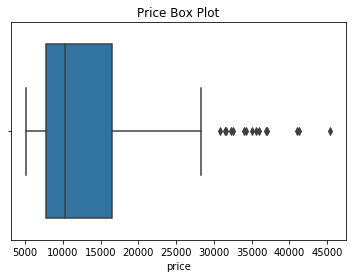

In [9]:
sns.boxplot(df['price'])
plt.title('Price Box Plot');

C:\Users\Anubhav Karelia\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


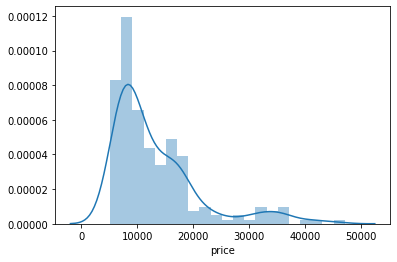

In [10]:
bins = np.arange(min(df['price']), max(df['price'])+2000, 2000)
sns.distplot(df['price'], bins=bins);

**NOTE:** The distribution of `price` which is our target variable is right skewed, so we cannot use Linear Regression for this dataset(Assumption Broke).

Instead we are using Gradient Boosting Algorithm.

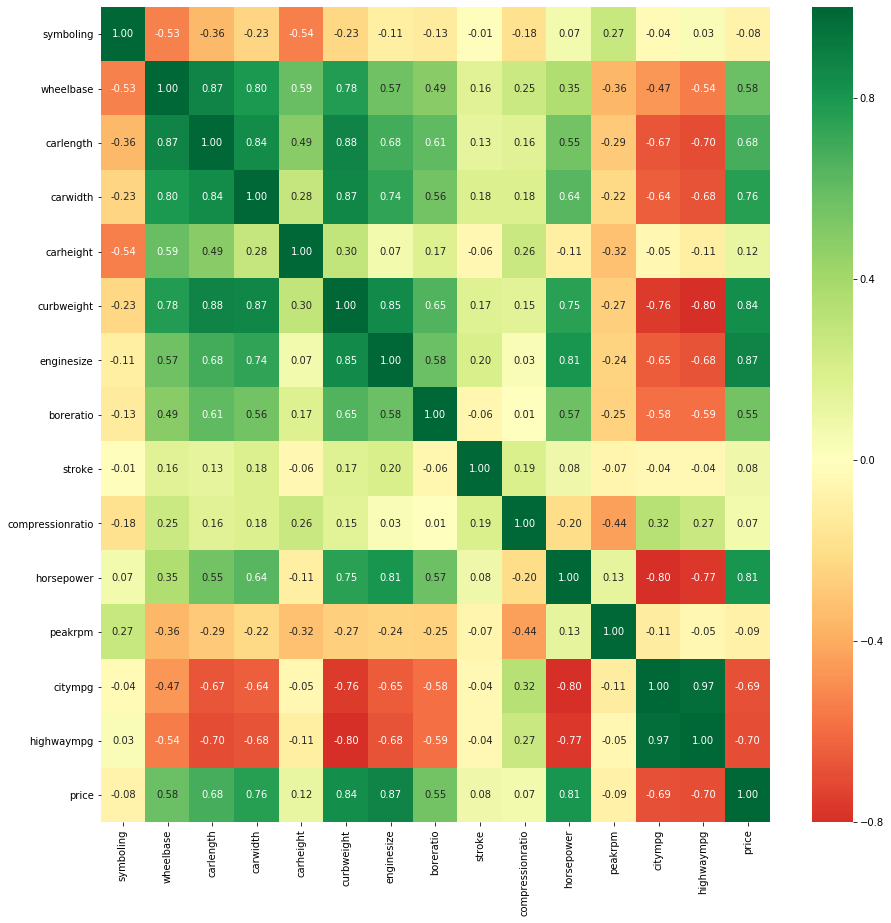

In [13]:
plt.figure(figsize=(15, 15))
sns.heatmap(df[num_cols].corr(), fmt='.2f', annot=True, cmap='RdYlGn', center=0);

### 6. Model Building

In [17]:
X = df.drop(['price'], axis=1)
y = df['price']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Gradient Boosting Regressor

* learning_rate = 0.05

In [21]:
gbr = GradientBoostingRegressor(learning_rate=0.05, random_state=42)

gbr.fit(X_train, y_train);

In [23]:
y_pred = gbr.predict(X_test)

In [30]:
def mean_absolute_percentage_error(y_test, y_pred):
    return np.mean(np.abs(np.array(y_test) - np.array(y_pred))/y_test) * 100

In [35]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}")

rscore = r2_score(y_test, y_pred)
print(f"R2 Score: {rscore}")

Mean Squared Error: 5495248.74040813
Mean Absolute Percentage Error: 12.358249006603206
R2 Score: 0.9206856025766006


**NOTE:** MAPE is quite higher, so let us try to tune the parameter again

#### Gradient Boosting Regressor

* learning_rate = 0.1

In [36]:
gbr = GradientBoostingRegressor(learning_rate=0.1, random_state=42)

gbr.fit(X_train, y_train);

In [37]:
y_pred = gbr.predict(X_test)

In [38]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}")

rscore = r2_score(y_test, y_pred)
print(f"R2 Score: {rscore}")

Mean Squared Error: 5194276.240762464
Mean Absolute Percentage Error: 12.211399370150406
R2 Score: 0.925029619304156


**NOTE:** MAPE has improved as compared to the previous model, let's again try tunning it using GridSearchCV.

### 8. Hyperparameter Tunning

### GridSearchCV

In [45]:
model = GradientBoostingRegressor(random_state=42)

param_grid = {
            'learning_rate': [0.1, 0.15, 0.2],
            'max_depth': [2, 3, 4, 6],
            'n_estimators': [100, 500, 1000],
            'min_samples_leaf': [1, 3, 5]
            }

grid = GridSearchCV(model, param_grid, refit=True, verbose=3, n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  1.9min finished


GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.15, 0.2],
                         'max_depth': [2, 3, 4, 6],
                         'min_samples_leaf': [1, 3, 5],
                         'n_estimators': [100, 500, 1000]},
             verbose=3)

In [46]:
print(grid.best_params_)

print(grid.best_estimator_)

{'learning_rate': 0.15, 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 1000}
GradientBoostingRegressor(learning_rate=0.15, max_depth=2, min_samples_leaf=5,
                          n_estimators=1000, random_state=42)


In [47]:
y_pred = grid.predict(X_test)

In [48]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error: {mape}")

rscore = r2_score(y_test, y_pred)
print(f"R2 Score: {rscore}")

Mean Squared Error: 6489484.611672349
Mean Absolute Percentage Error: 13.187485874551202
R2 Score: 0.9063355298590199


**SUMMARY:** Our model has permormed well with tunned parameters.